In [20]:
%matplotlib inline
from alpha_vantage.timeseries import TimeSeries
import matplotlib
import matplotlib.pyplot as plt
import os

%matplotlib inline
%load_ext autoreload
%autoreload 2

matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)
ALPHA_VANTAGE_API_KEY = os.environ['AV_API_KEY']

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2023-03-08 20:00:00,93.61,93.73,93.6100,93.7300,5269.0
2023-03-08 19:58:00,93.58,93.58,93.5700,93.5800,1460.0
2023-03-08 19:57:00,93.56,93.58,93.5500,93.5800,4243.0
2023-03-08 19:56:00,93.59,93.59,93.5799,93.5799,1548.0
2023-03-08 19:54:00,93.54,93.61,93.5400,93.6100,1364.0


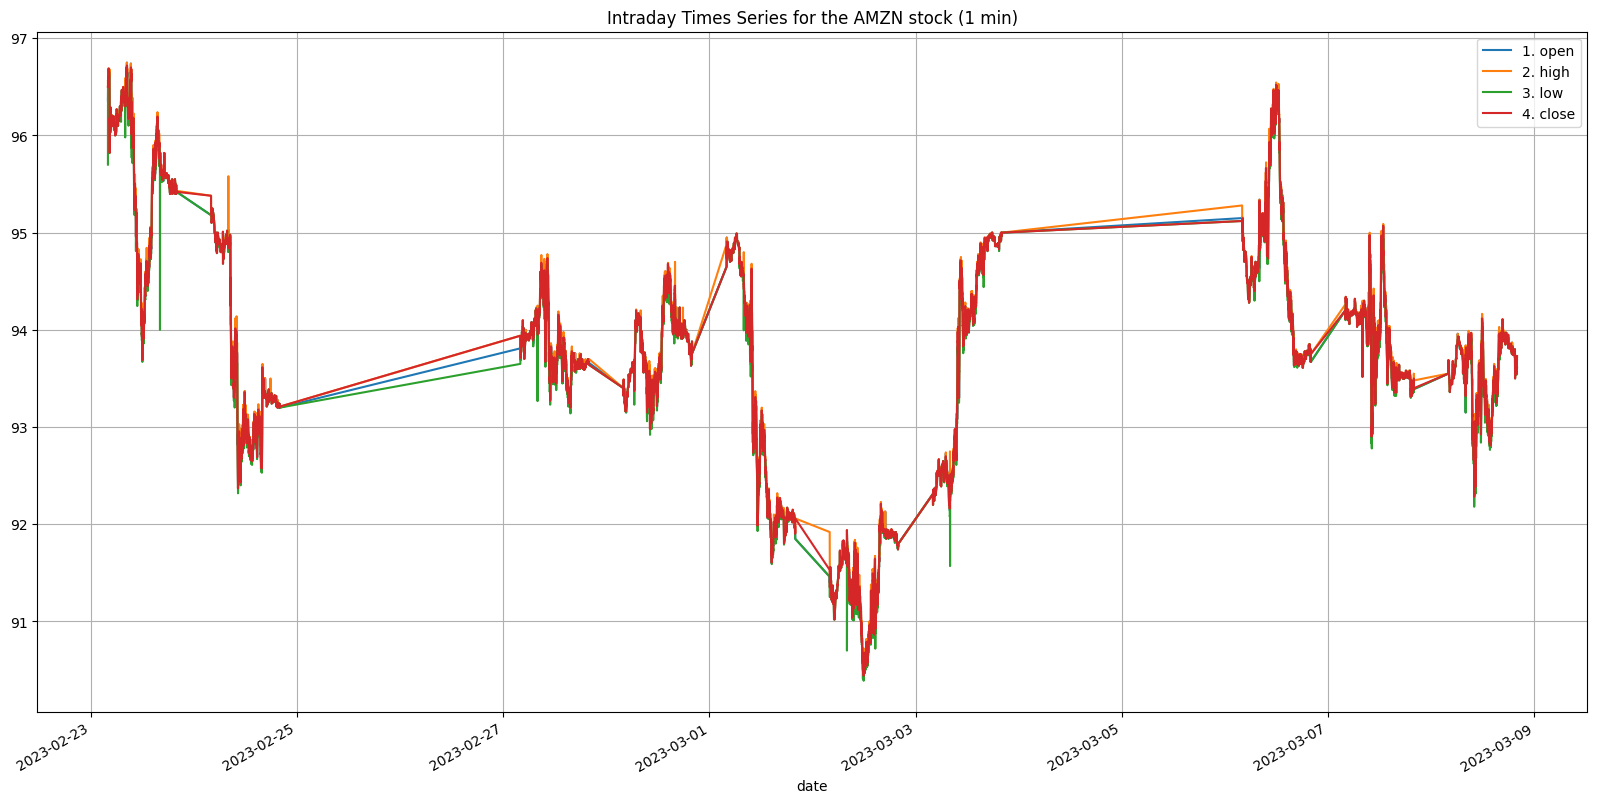

In [21]:
# Initialize the TimeSeries class with key and output format 
ts = TimeSeries(key=ALPHA_VANTAGE_API_KEY, output_format='pandas') 
 
# Get json object with the intraday data and information of the data 
intraday_data, data_info = ts.get_intraday('AMZN', outputsize='full', interval='1min') 

display(intraday_data.head())
intraday_data = intraday_data.drop(["5. volume"], axis=1)
intraday_data.plot()
plt.title('Intraday Times Series for the AMZN stock (1 min)')
plt.grid()
plt.show()

In [22]:
from tradingSimulator import TradingSimulator

# Initialization of the required variables
simulator = TradingSimulator()
strategy = "TDQN"
stock = "AMZN"
startingDate = '2012-1-1'
splitingDate = '2022-1-1'
endingDate = '2023-3-8'
money = 10000

# Training and testing of the trading strategy specified for the stock (market) specified
tradingStrategy, trainingEnv, testingEnv = simulator.simulateStrategy(strategy, 
                                                                      stock, 
                                                                      startingDate=startingDate, 
                                                                      endingDate=endingDate, 
                                                                      splitingDate=splitingDate, 
                                                                      money=money,
                                                                      numberOfEpisodes=50,
                                                                      stateLength=1,
                                                                      interactiveTest=True,
                                                                      showTestPerformance=True,
                                                                      testOnLiveData=True)